# Lista semana 7 - Pandas 2


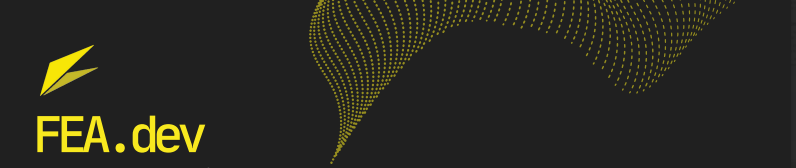

#### **Fala devs, beleza?**
Esta já é a penúltima lista, onde serão abordados mais assuntos relacionados com a biblioteca Pandas. Bom trabalho!

In [2]:
# Importe a biblioteca Pandas e as demais que pretende usar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Exercício 1:
Dado o seguinte DataFrame:

In [4]:
data = {'Nome': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Pedro', 'Jonas', 'Ana', 'Sofia'],
        'Idade': [25, 30, 22, 35, 28, 19, 27, 39, 29],
        'Salário': [4000, 4500, 3500, 5500, 4800, 3000, 6000, 5000, 4500]}

df = pd.DataFrame(data)
df.head()

,Nome,Idade,Salário
0,Alice,25,4000
1,Bob,30,4500
2,Charlie,22,3500
3,David,35,5500
4,Eva,28,4800


a) Use a função loc para selecionar as linhas correspondentes aos indivíduos com idades entre 25 e 30 anos.

In [12]:
## SEU CÓDIGO COMEÇA AQUI ##
df.loc[(df['Idade'] >= 25) & (df['Idade'] <= 30)]

,Nome,Idade,Salário
0,Alice,25,4000
1,Bob,30,4500
4,Eva,28,4800
6,Jonas,27,6000
8,Sofia,29,4500


b) Use a função iloc para selecionar as linhas correspondentes aos indivíduos na primeira e última posição do DataFrame e tire a média de seus salários.

In [14]:
## SEU CÓDIGO COMEÇA AQUI ##
df.iloc[[0, -1]]['Salário'].mean()

4250.0

## Exercício 2:
Dado o seguinte DataFrame:

In [18]:
data2 = {'Categoria': ['A', 'B', 'A', 'C', 'B', 'A', 'B', 'A', 'C', 'C', 'B', 'A'],
        'Valor': [100, 200, 150, 300, 250, 120, 140, 230, 390, 80, 160, 210]}

df2 = pd.DataFrame(data2)
df2.head()

,Categoria,Valor
0,A,100
1,B,200
2,A,150
3,C,300
4,B,250


a) Calcule a média dos valores para cada categoria.

In [22]:
## SEU CÓDIGO COMEÇA AQUI ##
df2.groupby('Categoria')['Valor'].mean()

Categoria
A    162.000000
B    187.500000
C    256.666667
Name: Valor, dtype: float64

b) Calcule a soma dos valores para cada categoria. O que possui a maior soma também possui a maior média? Qual a razão disso ocorrer ou não?

In [25]:
## SEU CÓDIGO COMEÇA AQUI ##
df_soma = df2.groupby('Categoria')['Valor'].sum()
print(df_soma)

Categoria
A    810
B    750
C    770
Name: Valor, dtype: int64


In [28]:
df2['Categoria'].value_counts()

Categoria
A    5
B    4
C    3
Name: count, dtype: int64

**Resposta:** A razão de a maior soma não possuir a mior média é devido a quantidade de itens/elementos em cada categoria.

## Exercício 3:
Dado o seguinte DataFrame:

In [29]:
data3 = {'Data': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02'],
        'Produto': ['A', 'B', 'A', 'B'],
        'Vendas': [100, 150, 200, 120]}

df3 = pd.DataFrame(data3)
df3.head()

,Data,Produto,Vendas
0,2023-01-01,A,100
1,2023-01-01,B,150
2,2023-01-02,A,200
3,2023-01-02,B,120


Crie uma tabela dinâmica (pivot table) que mostre as vendas totais para cada produto em cada data.

In [32]:
## SEU CÓDIGO COMEÇA AQUI #
tabela_din = pd.pivot_table(df3, values='Vendas', index=['Data'], columns=['Produto'], aggfunc='sum')
display(tabela_din)

Produto,A,B
Data,,
2023-01-01,100,150
2023-01-02,200,120


## Exercício 4:
Dado os seguintes DataFrames:

In [33]:
df_1 = pd.DataFrame({'Chave': ['A', 'B', 'C', 'D'],
                    'Valor1': [10, 12, 6, 4]})

df_2 = pd.DataFrame({'Chave': ['B', 'D', 'E', 'F'],
                    'Valor2': [9, 6, 11, 8]})

df_3 = pd.DataFrame({'Chave': ['C', 'D', 'E', 'G'],
                    'Valor3': [10, 7, 14, 15]})

a) Combine os DataFrames df1 e df2 com base na coluna 'Chave', e deixe a coluna chave como index. Inclua apenas as chaves que aparecem em ambos os dataframes

In [36]:
## SEU CÓDIGO COMEÇA AQUI ##
df_combinado = pd.merge(df_1, df_2, on='Chave', how='inner').set_index('Chave')
display(df_combinado)

,Valor1,Valor2
Chave,,
B,12,9
D,4,6


b) Combine os DataFrames df1, df2 e df3, incluindo todas as chaves e valores. Defina "Chave" como index e substitua os valores não existentes por 0.

In [41]:
## SEU CÓDIGO COMEÇA AQUI ##
df_combinado2 = pd.merge(df_1, pd.merge(df_2, df_3, on='Chave', how='outer'), on='Chave', how='outer').set_index('Chave').fillna(0)
df_combinado2

,Valor1,Valor2,Valor3
Chave,,,
A,10.0,0.0,0.0
B,12.0,9.0,0.0
C,6.0,0.0,10.0
D,4.0,6.0,7.0
E,0.0,11.0,14.0
F,0.0,8.0,0.0
G,0.0,0.0,15.0


c) Adicione uma nova coluna ao dataframe, contendo a soma do valor 1, 2 e 3 para cada chave.

In [43]:
## SEU CÓDIGO COMEÇA AQUI ##
df_combinado2['Soma Valores'] = df_combinado2['Valor1'] +  df_combinado2['Valor2'] + df_combinado2['Valor3']
df_combinado2

,Valor1,Valor2,Valor3,Soma Valores
Chave,,,,
A,10.0,0.0,0.0,10.0
B,12.0,9.0,0.0,21.0
C,6.0,0.0,10.0,16.0
D,4.0,6.0,7.0,17.0
E,0.0,11.0,14.0,25.0
F,0.0,8.0,0.0,8.0
G,0.0,0.0,15.0,15.0


## Exercício 5
Vamos importar dados de ações utilizando a biblioteca Yahoo Finance, e você trabalhará em cima deste dataframe.

In [44]:
# Caso não tenha essa biblioteca instalada, rode o código a seguir:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/e6/b3/388ab967a387cc92926f70e97688dd9a7189b29a0773db815ffc5289e2b5/yfinance-0.2.31-py2.py3-none-any.whl.metadata
  Obtaining dependency information for lxml>=4.9.1 from https://files.pythonhosted.org/packages/31/58/e3b3dd6bb2ab7404f1f4992e2d0e6926ed40cef8ce1b3bbefd95877499e1/lxml-4.9.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     --- ------------------------------------ 0.2/2.9 MB 4.8 MB/s eta 0:00:01
     --------------- ------------------------ 1.2/2.9 MB 12.4 MB/s eta 0:00:01
     ------------------ --------------------- 1.3/2.9 MB 14.2 MB/s eta 0:00:01
     ---------------------------- ----------- 2.1/2.9 MB 11.2 MB/s eta 0:00:01
     -------------------------------------- - 2.8/2.9 MB 12.8 MB/s eta 0:00:01
     ---------------------------------------- 2.9/2.9 MB 11.7 MB/s eta 0:00:00
  Installing build dependencies: started



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
# importando a biblioteca:
import yfinance as yf


ticker_symbol = ["PETR4.SA"]  # Substitua pela ação de sua escolha, se quiser
start_date = "2022-06-01"
end_date = "2023-10-01"
#dataframe:
data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


a) Faça um novo dataframe, contendo as colunas de preço de fechamento ajustado ('Adj Close') e de volume de negociações ('Volume').

In [46]:
## SEU CÓDIGO COMEÇA AQUI ##
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-01,29.900000,30.330000,29.850000,30.020000,17.209848,46353200
2022-06-02,29.969999,30.049999,29.549999,29.760000,17.060797,50738300
2022-06-03,29.709999,30.440001,29.530001,30.280001,17.358904,60396900
2022-06-06,30.500000,30.530001,29.910000,30.299999,17.370367,39213900
2022-06-07,30.190001,31.299999,30.160000,30.660000,17.576746,80333700


In [47]:
data[['Adj Close', 'Volume']]

,Adj Close,Volume
Date,,
2022-06-01,17.209848,46353200
2022-06-02,17.060797,50738300
2022-06-03,17.358904,60396900
2022-06-06,17.370367,39213900
2022-06-07,17.576746,80333700
...,...,...
2023-09-25,34.250000,26767200
2023-09-26,33.459999,60687500
2023-09-27,34.520000,53708700


b) Em qual dia a ação atingiu sua maior cotação?

c) Em qual dia a ação foi mais negociada?

In [ ]:
## SEU CÓDIGO COMEÇA AQUI ##

d) Adicione uma coluna no dataframe, contendo a variação percentual da cotação da ação

In [ ]:
## SEU CÓDIGO COMEÇA AQUI ##

e) Calcule o retorno anualizado médio da ação. Considere que um ano possui 252 dias úteis em média.

In [ ]:
## SEU CÓDIGO COMEÇA AQUI #

## QUESTÃO 6

Você tem um DataFrame com informações sobre produtos em um estoque, incluindo nomes de produtos, preços e quantidades em estoque. Resolva as seguintes tarefas:

a) Agrupe os produtos por categoria e calcule a média e a mediana dos preços por categoria.

In [ ]:
data = {'Produto': ['A', 'B', 'C', 'D', 'E'],
        'Categoria': ['Eletrônicos', 'Roupas', 'Eletrônicos', 'Roupas', 'Eletrônicos'],
        'Preço': [1000, 50, 800, 30, 1200],
        'Quantidade_Estoque': [10, 15, 5, 8, 12]}

##seu código começa aqui###

b) Encontre o produto mais caro em estoque.

In [ ]:
data = {'Produto': ['A', 'B', 'C', 'D', 'E'],
        'Categoria': ['Eletrônicos', 'Roupas', 'Eletrônicos', 'Roupas', 'Eletrônicos'],
        'Preço': [1000, 50, 800, 30, 1200],
        'Quantidade_Estoque': [10, 15, 5, 8, 12]}

##seu código começa aqui###

## QUESTÃO 7

Suponha que você tenha um DataFrame com informações sobre jogos de video game, incluindo o nome do jogo, a plataforma em que ele foi lançado e sua classificação. Realize as seguintes tarefas:

a) Crie um DataFrame a partir dos seguintes dados:

In [ ]:
data = {'Nome_Jogo': ['Super Mario Odyssey', 'The Legend of Zelda', 'FIFA 22', 'Call of Duty: Warzone'],
        'Plataforma': ['Nintendo Switch', 'Nintendo Switch', 'PlayStation 5', 'Xbox Series X'],
        'Classificacao': ['E', 'E', 'E', 'M']}


In [ ]:
### seu código começa aqui###

b) Agrupe os jogos por plataforma e conte quantos jogos estão disponíveis em cada plataforma.

In [ ]:
### seu código começa aqui###

c) Encontre a plataforma com a maior quantidade de jogos.

In [ ]:
### seu código começa aqui###

## QUESTÃO 8

Você possui um DataFrame com informações sobre espécies de árvores encontradas em diferentes estados do Brasil. O DataFrame possui as colunas 'Estado', 'Espécie', 'Quantidade', e 'Altura Média'. Crie uma análise de dados para responder às seguintes perguntas e aprenda algumas curiosidades interessantes sobre as árvores do Brasil:

In [ ]:
import pandas as pd

data = {'Estado': ['São Paulo', 'São Paulo', 'Rio de Janeiro', 'Rio de Janeiro', 'Minas Gerais'],
        'Espécie': ['Ipê Amarelo', 'Ipê Roxo', 'Ipê Amarelo', 'Ipê Roxo', 'Quaresmeira'],
        'Quantidade': [100, 50, 80, 40, 70],
        'Altura Média': [8, 7, 7, 6, 10]}

df = pd.DataFrame(data)


a) Qual é a espécie de árvore mais comum em cada estado? Mostre uma lista com o nome do estado e a espécie mais comum.

In [ ]:
### seu código começa aqui###

b) Qual é a altura média das árvores por espécie? Apresente uma tabela que lista as espécies e suas alturas médias.

In [ ]:
### seu código começa aqui###

c) Qual é o estado com a maior altura média de árvores? Mostre o nome do estado e sua altura média.

In [1]:
### seu código começa aqui###

d) Qual é o estado com a maior quantidade total de árvores? Mostre o nome do estado e a quantidade total de árvores.

In [2]:
### seu código começa aqui###

e) Qual é a espécie de árvore com a menor altura média? Mostre o nome da espécie e sua altura média.

In [3]:
### seu código começa aqui###

# DESAFIO 

Você possui um DataFrame com informações sobre uma temporada da Fórmula 1. O DataFrame contém as colunas 'Piloto', 'Equipe', 'Pontuação' e 'Vitórias'. Sua tarefa é encontrar o melhor piloto da temporada com base em sua pontuação e número de vitórias.

In [ ]:
import pandas as pd

data = {'Piloto': ['Lewis Hamilton', 'Max Verstappen', 'Charles Leclerc', 'Lando Norris', 'Valtteri Bottas'],
        'Equipe': ['Mercedes', 'Red Bull Racing', 'Ferrari', 'McLaren', 'Mercedes'],
        'Pontuação': [385, 391, 334, 256, 221],
        'Vitórias': [10, 9, 6, 3, 2]}

df = pd.DataFrame(data)


Encontre o melhor piloto da temporada de acordo com a pontuação e número de vitórias. O melhor piloto é aquele que tem a maior pontuação e, em caso de empate na pontuação, o maior número de vitórias.

In [ ]:
### seu código começa aqui###